In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.
import seaborn as sns
import matplotlib.pyplot as plt

/kaggle/input/fatal-police-shootings-in-the-us/PercentOver25CompletedHighSchool.csv
/kaggle/input/fatal-police-shootings-in-the-us/MedianHouseholdIncome2015.csv
/kaggle/input/fatal-police-shootings-in-the-us/ShareRaceByCity.csv
/kaggle/input/fatal-police-shootings-in-the-us/PoliceKillingsUS.csv
/kaggle/input/fatal-police-shootings-in-the-us/PercentagePeopleBelowPovertyLevel.csv


In [2]:
from subprocess import check_output

In [3]:
d1school= pd.read_csv("/kaggle/input/fatal-police-shootings-in-the-us/PercentOver25CompletedHighSchool.csv",encoding="windows-1252")

In [4]:
d2policekill= pd.read_csv("/kaggle/input/fatal-police-shootings-in-the-us/PoliceKillingsUS.csv",encoding="windows-1252")

In [5]:
d2policekill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [6]:
d3income= pd.read_csv("/kaggle/input/fatal-police-shootings-in-the-us/MedianHouseholdIncome2015.csv",encoding="windows-1252")
d4racecity= pd.read_csv("/kaggle/input/fatal-police-shootings-in-the-us/ShareRaceByCity.csv",encoding="windows-1252")
d5poverty= pd.read_csv("/kaggle/input/fatal-police-shootings-in-the-us/PercentagePeopleBelowPovertyLevel.csv",encoding="windows-1252")

In [7]:
d5poverty.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [8]:
d5poverty.poverty_rate.value_counts(dropna=False)

0       1464
-        201
7.4      129
6.7      129
10.9     128
        ... 
93.3       1
65.9       1
94.1       1
74.6       1
77.9       1
Name: poverty_rate, Length: 771, dtype: int64

In [9]:
d5poverty.poverty_rate.replace(["-"],0.0,inplace=True)

In [10]:
d5poverty.poverty_rate.astype(float)

0        78.8
1        29.1
2        25.5
3        30.7
4        42.0
         ... 
29324    18.6
29325    15.3
29326     5.9
29327     5.4
29328     0.0
Name: poverty_rate, Length: 29329, dtype: float64

In [11]:
d5poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
Geographic Area    29329 non-null object
City               29329 non-null object
poverty_rate       29329 non-null object
dtypes: object(3)
memory usage: 687.5+ KB


In [12]:
d5poverty.poverty_rate=d5poverty.poverty_rate.astype(float)

In [13]:
d5poverty.dtypes

Geographic Area     object
City                object
poverty_rate       float64
dtype: object

In [14]:
d5poverty.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42.0


In [15]:
d5poverty.groupby("Geographic Area")

In [16]:
area_list= list(d5poverty["Geographic Area"].unique())

In [17]:
area_rate=[]
for i in area_list:
    x=d5poverty[d5poverty["Geographic Area"]==i]
    area_rate.append(sum(x.poverty_rate)/len(x))

In [18]:
data=pd.DataFrame({"area_name":area_list,"area_rate":area_rate})

In [19]:
data

,area_name,area_rate
0,AL,20.611795
1,AK,18.678592
2,AZ,25.268071
3,AR,22.963216
4,CA,16.888371
5,CO,13.187773
6,CT,9.137500
7,DE,12.555844
8,DC,18.000000
9,FL,17.508606


In [20]:
data.sort_values(by="area_rate",ascending=False,inplace=True)

In [21]:
data

,area_name,area_rate
24,MS,26.884254
2,AZ,25.268071
10,GA,23.663636
3,AR,22.963216
31,NM,22.507675
18,LA,22.291772
40,SC,22.105556
48,WV,21.082222
0,AL,20.611795
36,OK,20.545895


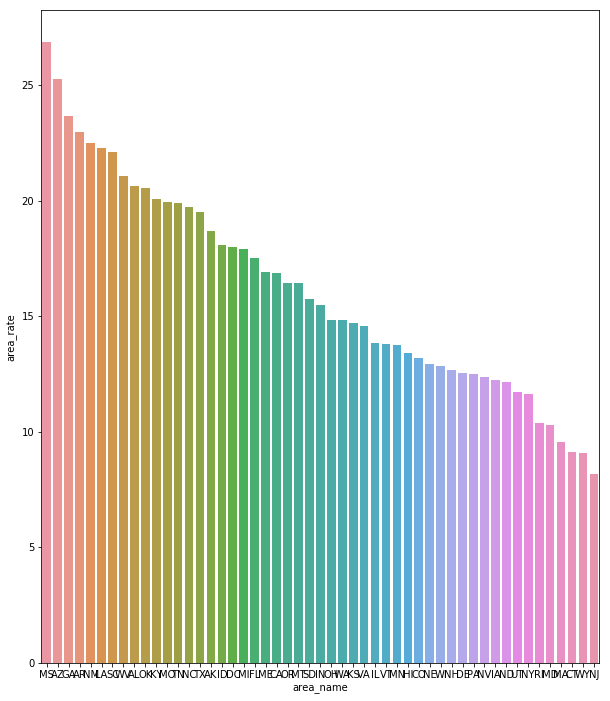

In [22]:
plt.figure(figsize=(10,12))
axes=sns.barplot(data.area_name,data.area_rate)

In [23]:
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

In [24]:
plt.show()

Text(0.5, 1.0, 'Poverty Rates of States')

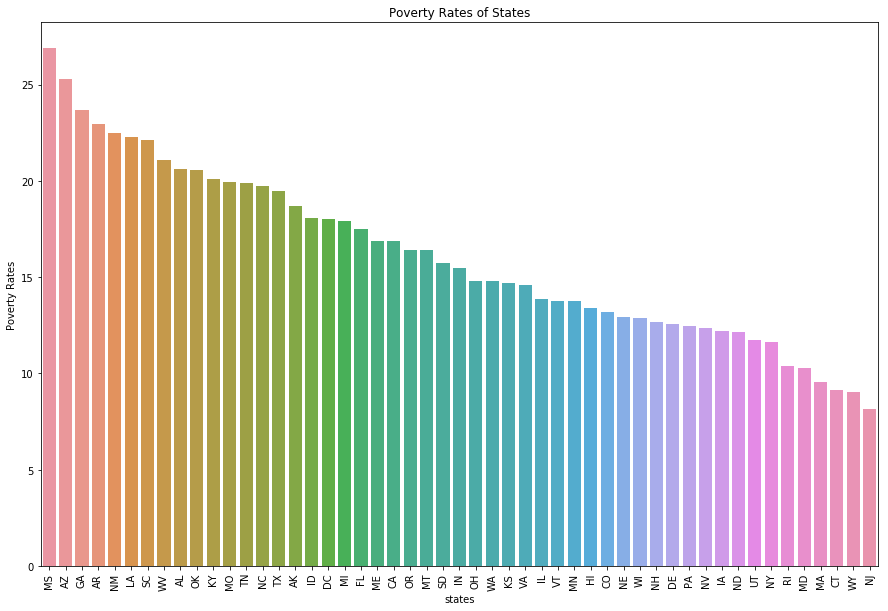

In [25]:
plt.figure(figsize=(15,10))
axes=sns.barplot(data.area_name,data.area_rate)
plt.xticks(rotation=90)
plt.xlabel("states")
plt.ylabel("Poverty Rates")
plt.title("Poverty Rates of States")

In [26]:
d2policekill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [27]:
names_list=list(d2policekill["name"])

In [28]:
names_list

['Tim Elliot',
 'Lewis Lee Lembke',
 'John Paul Quintero',
 'Matthew Hoffman',
 'Michael Rodriguez',
 'Kenneth Joe Brown',
 'Kenneth Arnold Buck',
 'Brock Nichols',
 'Autumn Steele',
 'Leslie Sapp III',
 'Patrick Wetter',
 'Ron Sneed',
 'Hashim Hanif Ibn Abdul-Rasheed',
 'Nicholas Ryan Brickman',
 'Omarr Julian Maximillian Jackson',
 'Loren Simpson',
 'James Dudley Barker',
 'Artago Damon Howard',
 'Thomas Hamby',
 'Jimmy Foreman',
 'Andy Martinez',
 'Tommy Smith',
 'Brian  Barbosa',
 'Salvador Figueroa',
 "John Edward O'Keefe",
 'Richard McClendon',
 'Marcus Golden',
 'Michael Goebel',
 'Mario Jordan',
 'Talbot Schroeder',
 'Robert Edwards',
 'Jeffrey R. Nielson',
 'Donte Sowell',
 'Kavonda Earl Payton',
 'Quincy Reed Reindl',
 'Jose Ceja',
 'Nathan Massey',
 'Scott Hall',
 'Zaki Shinwary',
 'Terence Walker',
 'Pablo Meza',
 'Daniel Brumley',
 'Jonathan Guillory',
 'Carter Castle',
 'Paul Campbell',
 'Dewayne Carr',
 'Todd Allen Hodge',
 'Miguel Angel de Santos-Rodriguez',
 'Isaac Hol

In [29]:
names_list_sep=[]
for i in names_list:
    names_list_sep.append(i.split(" "))

In [30]:
names_list_sep

[['Tim', 'Elliot'],
 ['Lewis', 'Lee', 'Lembke'],
 ['John', 'Paul', 'Quintero'],
 ['Matthew', 'Hoffman'],
 ['Michael', 'Rodriguez'],
 ['Kenneth', 'Joe', 'Brown'],
 ['Kenneth', 'Arnold', 'Buck'],
 ['Brock', 'Nichols'],
 ['Autumn', 'Steele'],
 ['Leslie', 'Sapp', 'III'],
 ['Patrick', 'Wetter'],
 ['Ron', 'Sneed'],
 ['Hashim', 'Hanif', 'Ibn', 'Abdul-Rasheed'],
 ['Nicholas', 'Ryan', 'Brickman'],
 ['Omarr', 'Julian', 'Maximillian', 'Jackson'],
 ['Loren', 'Simpson'],
 ['James', 'Dudley', 'Barker'],
 ['Artago', 'Damon', 'Howard'],
 ['Thomas', 'Hamby'],
 ['Jimmy', 'Foreman'],
 ['Andy', 'Martinez'],
 ['Tommy', 'Smith'],
 ['Brian', '', 'Barbosa'],
 ['Salvador', 'Figueroa'],
 ['John', 'Edward', "O'Keefe"],
 ['Richard', 'McClendon'],
 ['Marcus', 'Golden'],
 ['Michael', 'Goebel'],
 ['Mario', 'Jordan'],
 ['Talbot', 'Schroeder'],
 ['Robert', 'Edwards'],
 ['Jeffrey', 'R.', 'Nielson'],
 ['Donte', 'Sowell'],
 ['Kavonda', 'Earl', 'Payton'],
 ['Quincy', 'Reed', 'Reindl'],
 ['Jose', 'Ceja'],
 ['Nathan', 'Mass

In [31]:
a,b = zip(*names_list_sep)

In [32]:
names2=a+b

In [33]:
import collections
names_count=collections.Counter(names2)

In [34]:
names_count

Counter({'Tim': 3,
         'Lewis': 5,
         'John': 42,
         'Matthew': 24,
         'Michael': 91,
         'Kenneth': 19,
         'Brock': 1,
         'Autumn': 1,
         'Leslie': 3,
         'Patrick': 13,
         'Ron': 2,
         'Hashim': 1,
         'Nicholas': 13,
         'Omarr': 1,
         'Loren': 3,
         'James': 56,
         'Artago': 1,
         'Thomas': 26,
         'Jimmy': 5,
         'Andy': 1,
         'Tommy': 3,
         'Brian': 12,
         'Salvador': 4,
         'Richard': 36,
         'Marcus': 5,
         'Mario': 8,
         'Talbot': 1,
         'Robert': 48,
         'Jeffrey': 18,
         'Donte': 3,
         'Kavonda': 1,
         'Quincy': 2,
         'Jose': 28,
         'Nathan': 6,
         'Scott': 23,
         'Zaki': 1,
         'Terence': 3,
         'Pablo': 3,
         'Daniel': 45,
         'Jonathan': 13,
         'Carter': 2,
         'Paul': 19,
         'Dewayne': 3,
         'Todd': 9,
         'Miguel': 10,
       

In [35]:
most_common=names_count.most_common(15)

In [36]:
most_common

[('TK', 100),
 ('Michael', 91),
 ('David', 57),
 ('James', 56),
 ('Robert', 48),
 ('Joseph', 48),
 ('William', 47),
 ('Daniel', 45),
 ('John', 42),
 ('Christopher', 40),
 ('Lee', 37),
 ('Richard', 36),
 ('', 36),
 ('J.', 32),
 ('Anthony', 31)]

In [37]:
x,y=zip(*most_common)

In [38]:
x,y=list(x),list(y)
x.pop(0)
y.pop(0)

100

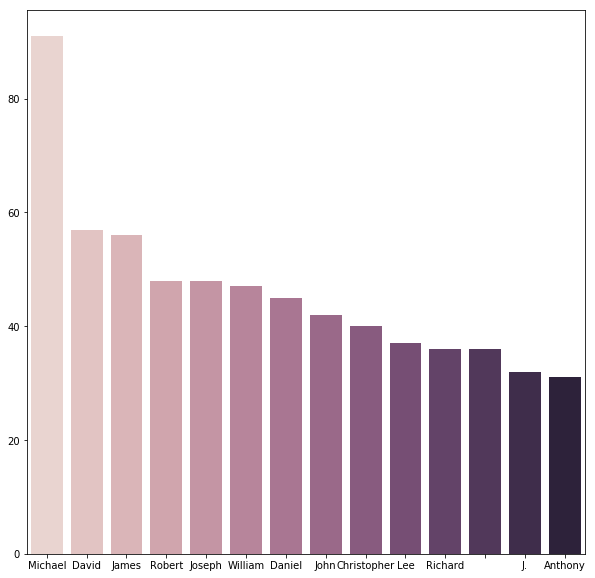

In [39]:
plt.figure(figsize=(10,10))
sns.barplot(x,y,palette=sns.cubehelix_palette(len(x)))

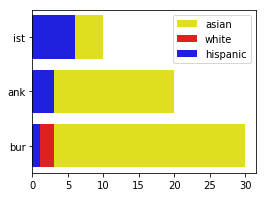

In [40]:
asian=[10,20,30]
white=[5,2,3]
hispanic=[6,3,1]
area=["ist","ank","bur"]
f,ax= plt.subplots(figsize=(4,3))
sns.barplot(asian,area,label="asian",alpha=1,color="yellow")
sns.barplot(white,area,label="white",alpha=1,color="red")
sns.barplot(hispanic,area,label="hispanic",alpha=1,color="blue")
ax.legend(frameon=True)